This is the project on image classification. The data set  is extracted from the below link.


https://www.kaggle.com/pmigdal/alien-vs-predator-images.


For this project i am using the kaggle api to extract the data. 


###About the data

Content

Alien and Predator images (JPG, various ), for transfer learning. Split into Keras folder structure.

Format: JPG images, various thumbnail sizes (around 250 x 250 px).

Volume:

train: 247 aliens and 247 predators

validation: 100 aliens and 100 predators


####Gathering the data using the kaggle API

In [0]:
#updating the kaggle api

!pip install kaggle --upgrade


Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sarma9032","key":"e22939fd15d86406d7362d0cba85e786"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
#for searching the datasets with specific term 

!kaggle datasets list -s alien-vs-predator-images

ref                               title                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------  -------------------------  ----  -------------------  -------------  ---------  ---------------  
pmigdal/alien-vs-predator-images  Alien vs. Predator images   7MB  2018-09-27 14:18:46            786         14  0.875            


In [0]:
!kaggle datasets download -dpmigdal/alien-vs-predator-images

  0% 0.00/7.05M [00:00<?, ?B/s]
100% 7.05M/7.05M [00:00<00:00, 142MB/s]


In [0]:
!unzip \*.zip

Archive:  alien-vs-predator-images.zip
   creating: data/
   creating: data/validation/
   creating: data/train/
   creating: data/validation/predator/
  inflating: data/validation/predator/99.jpg  
  inflating: data/validation/predator/98.jpg  
  inflating: data/validation/predator/97.jpg  
  inflating: data/validation/predator/96.jpg  
  inflating: data/validation/predator/95.jpg  
  inflating: data/validation/predator/94.jpg  
  inflating: data/validation/predator/93.jpg  
  inflating: data/validation/predator/92.jpg  
  inflating: data/validation/predator/91.jpg  
  inflating: data/validation/predator/90.jpg  
  inflating: data/validation/predator/89.jpg  
  inflating: data/validation/predator/88.jpg  
  inflating: data/validation/predator/87.jpg  
  inflating: data/validation/predator/86.jpg  
  inflating: data/validation/predator/85.jpg  
  inflating: data/validation/predator/84.jpg  
  inflating: data/validation/predator/83.jpg  
  inflating: data/validation/predator/82.jpg  
  

####We have gathered the data by running the above code

In [0]:
#importing the necessary modeules in python 

import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility

seed = 128
np.random.seed(seed) 

In [0]:
#Data augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [0]:
training_set = train_datagen.flow_from_directory('/content/data/train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32,
                                                   class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/data/validation',
                                                target_size = (64, 64),
                                                 batch_size = 32, 
                                                 class_mode = 'binary')

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


###Building CNN



In [0]:
classifier = Sequential()#initializing the newtwork

classifier.add(Convolution2D(filters = 32, kernel_size=(3,3), data_format= "channels_last", input_shape=(64, 64, 3), activation="relu"))#create Convolutional Layer

In [0]:
#Create Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
#Adding a second convolutional layer to improve the accuracy

classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
#adding third convolutional layer

classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
#Create Flattening
classifier.add(Flatten())

In [0]:
#Create Fully Connection

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
#Compiling CNN

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


###Fitting the model

In [0]:
history = classifier.fit_generator(training_set, 
                         samples_per_epoch = 694, 
                        nb_epoch = 30, 
                        validation_data = test_set, 
                        nb_val_samples = 2025)


Epoch 1/30
21/21 [==============================] - 95s 5s/step - loss: 0.6915 - acc: 0.5330 - val_loss: 0.6540 - val_acc: 0.6050
Epoch 2/30
21/21 [==============================] - 89s 4s/step - loss: 0.6378 - acc: 0.6280 - val_loss: 0.6956 - val_acc: 0.5750
Epoch 3/30
21/21 [==============================] - 89s 4s/step - loss: 0.6062 - acc: 0.6780 - val_loss: 0.5895 - val_acc: 0.6401
Epoch 4/30
21/21 [==============================] - 89s 4s/step - loss: 0.5680 - acc: 0.7147 - val_loss: 0.5485 - val_acc: 0.6900
Epoch 5/30
21/21 [==============================] - 89s 4s/step - loss: 0.5169 - acc: 0.7381 - val_loss: 0.6518 - val_acc: 0.6199
Epoch 6/30
21/21 [==============================] - 89s 4s/step - loss: 0.5434 - acc: 0.7387 - val_loss: 0.5912 - val_acc: 0.6501
Epoch 7/30
21/21 [==============================] - 89s 4s/step - loss: 0.5628 - acc: 0.7142 - val_loss: 0.5357 - val_acc: 0.7250
Epoch 8/30
21/21 [==============================] - 89s 4s/step - loss: 0.5298 - acc: 0.7

In [0]:
import os
import cv2


In [0]:
from PIL import Image

In [0]:
from IPython.display import Image

Probability that it is a alien =  0.00


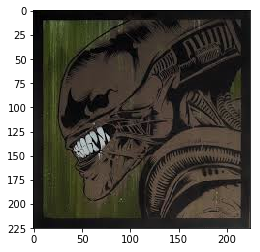

In [0]:
#Image(os.path.join(path,"train/predator/127.jpg"))


imgAlien = cv2.imread("/content/data/validation/alien/15.jpg")
#y_pred = classifier.predict(Image)



plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))


Probability that it is a alien =  1.00


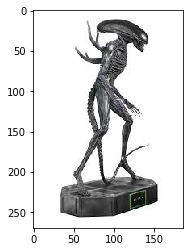

In [0]:
#Image(os.path.join(path,"train/predator/127.jpg"))


imgAlien = cv2.imread("/content/data/validation/alien/40.jpg")
#y_pred = classifier.predict(Image)



plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))


Probability that it is a alien =  0.00


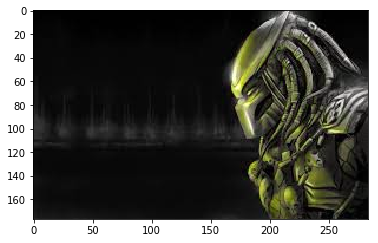

In [0]:
#Image(os.path.join(path,"train/predator/127.jpg"))


imgAlien = cv2.imread("/content/data/validation/predator/90.jpg")
plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))


Probability that it is a alien =  0.00


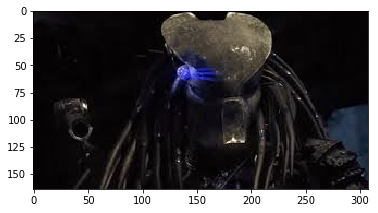

In [0]:
#Image(os.path.join(path,"train/predator/127.jpg"))


imgAlien = cv2.imread("/content/data/validation/predator/69.jpg")
plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))


Probability that it is a alien =  0.00


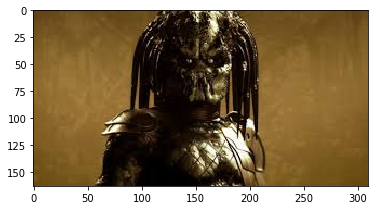

In [0]:
#Image(os.path.join(path,"train/predator/127.jpg"))


imgAlien = cv2.imread("/content/data/validation/predator/79.jpg")
plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))


## project compleated... yay!!!!!